In [1]:
import tensorflow as tf 
import numpy as np 

2025-01-02 10:29:05.759263: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-02 10:29:05.761204: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-02 10:29:05.822784: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-02 10:29:05.874426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735831745.917548   67201 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735831745.92

In [2]:
# version
tf.__version__

'2.18.0'

In [4]:
tensor =  tf.constant(3)
print(tensor)

tf.Tensor(3, shape=(), dtype=int32)


In [5]:
# Rank 1 Tensor 
b = tf.constant([1 , 2 , 3 , 4])

# Rank 2 Tensor 
c = tf.constant([[1 , 2] , [3 , 4]])

In [7]:
# using numpy
array = np.array([1 , 2 , 3 , 4])
print(" Before " , array)
array = tf.convert_to_tensor(array)
print(" After " , array)

 Before  [1 2 3 4]
 After  tf.Tensor([1 2 3 4], shape=(4,), dtype=int64)


In [8]:
# Sample 2D tensor
tensor = tf.constant([[1 , 2] , [3 , 4]])

# Creating first neural network

In [9]:
tensor = tf.constant([[1 , 2] , [5 , 10]] , dtype=tf.float64)
tensor

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[ 1.,  2.],
       [ 5., 10.]])>

In [10]:
# Applying softmax 
tf.nn.softmax(tensor)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.26894142, 0.73105858],
       [0.00669285, 0.99330715]])>

In [11]:
# Applying sigmoid 
tf.nn.sigmoid(tensor)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.73105858, 0.88079708],
       [0.99330715, 0.9999546 ]])>

In [12]:
# Applying relu 
tf.nn.relu(tensor)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[ 1.,  2.],
       [ 5., 10.]])>

In [13]:
# Applying lrelu 
tf.nn.leaky_relu(tensor)

# Tensorflow has all the Activation functions built it and ready to use 

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[ 1.,  2.],
       [ 5., 10.]])>

In [14]:
#---------
# optimizers
#--------

# Tensorflow has all Optimizers that we discussed in the class 

Optimizer = tf.keras.optimizers.Adam()
print(Optimizer) # Refers to Optimizer class created 

In [15]:
#--------------------
# BASIC NN STRUCTURE
#-------------------

# Start your model with Sequential Object  
model = tf.keras.models.Sequential()
# Next add in your Input object and Specify the Dimension you want to pass in 
model.add(tf.keras.Input(shape=(10,)))
# Add in your Neurons of 1st layer
model.add(tf.keras.layers.Dense(32))
# 2nd layer 
model.add(tf.keras.layers.Dense(16))

# print summary to undertstand your neural network flow
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 880 (3.44 KB)

 Trainable params: 880 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

# USING THE NN TO PREDICT AN OUTCOME 

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv("../archive/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data.drop(['RowNumber', 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [20]:
# Check if Data has any null values 
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
# Check for Object datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [22]:
# Label encode Object Datatypes 

data_types_dict = dict(data.dtypes)
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [23]:
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)

In [24]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [25]:
#---------------------------------------------
# CREATING THE NN --> JUST ONE OUTPUT NEURON 
#---------------------------------------------

# Start your model with Sequential Object  
model = tf.keras.models.Sequential()
# Next add in your Input object and Specify the Dimension you want to pass in 
model.add(tf.keras.Input(shape=(10,)))
# Add in your Neurons of 1st layer
model.add(tf.keras.layers.Dense(32))
# 2nd layer 
model.add(tf.keras.layers.Dense(32))
# Final Sigmoid layer to predict (0/1)
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to understand your neural network flow
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Create optimizer and compile  model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [27]:
# TRAINING THE MODEL
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6387 - loss: 920.0718 - val_accuracy: 0.8020 - val_loss: 282.7215
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6735 - loss: 441.1938 - val_accuracy: 0.7275 - val_loss: 286.6008
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6742 - loss: 342.0328 - val_accuracy: 0.7365 - val_loss: 333.6875
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - loss: 323.8836 - val_accuracy: 0.5600 - val_loss: 654.0751
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - loss: 356.4834 - val_accuracy: 0.8020 - val_loss: 329.4886
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - loss: 425.2507 - val_accuracy: 0.5650 - val_loss: 195.3271
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6717 - loss: 262.9825 - val_accuracy: 0.5975 - val_loss: 301.4966
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6699 - los

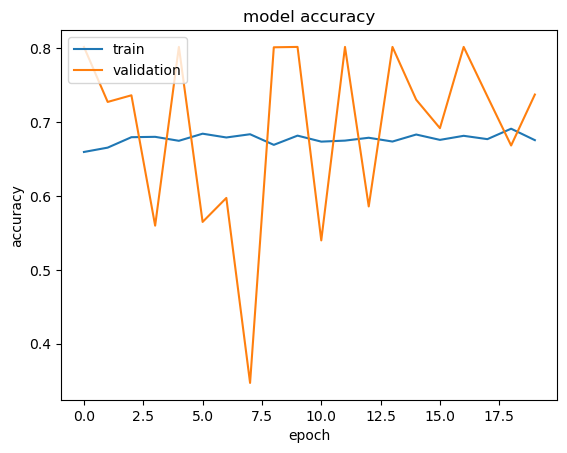

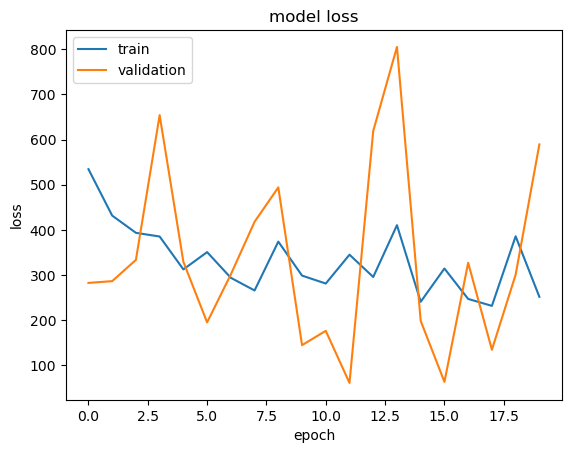

In [28]:
# CHECK THE PERFORMANCE 

#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [29]:
# collect predictions 
predictions = np.round(model.predict(Xtest))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [30]:
# Check Accuracy

from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(Ytest , predictions) # Accuracy Seems good

0.7375

In [31]:
confusion_matrix(Ytest , predictions)

array([[1409,  195],
       [ 330,   66]])

# IMPROVING PERFORMANCE

In [32]:
# -------------------------------------------
# Add class weights when Data is Imbalanced 
# -------------------------------------------

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced' ,  classes = np.unique(Ytrain), y=Ytrain)

model_class_weights = {}
for e , weight in enumerate(class_weights):
    model_class_weights[e] = weight

In [33]:
#-------------------------------------------
# IMPROVEMENTS IN MODEL ARE 
#
#   *Add in Class weights to handle Imbalance 
#   *Increase Units in Dense layers and Also Increase Number of Layers 
#   *Add BatchNormalization to Layers 
#   *Add Dropout after Layers
#-------------------------------------------

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64 , activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32 , activation='relu'))
model.add(tf.keras.layers.Dense(1 , activation='sigmoid'))

# print summary to understand your neural network flow
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,585 (49.16 KB)

 Trainable params: 12,181 (47.58 KB)

 Non-trainable params: 404 (1.58 KB)

In [34]:
# Create optimizer and compile model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [35]:
history = model.fit(Xtrain , Ytrain , validation_data=(Xtest , Ytest) , epochs=20 , class_weight=model_class_weights)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5840 - loss: 0.6628 - val_accuracy: 0.6920 - val_loss: 0.5835
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7201 - loss: 0.5423 - val_accuracy: 0.7110 - val_loss: 0.5340
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7136 - loss: 0.5291 - val_accuracy: 0.7800 - val_loss: 0.4590
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7363 - loss: 0.5218 - val_accuracy: 0.7830 - val_loss: 0.4581
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7514 - loss: 0.5081 - val_accuracy: 0.7740 - val_loss: 0.4720
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7555 - loss: 0.5005 - val_accuracy: 0.7820 - val_loss: 0.4645
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7563 - loss: 0.4834 - val_accuracy: 0.7790 - val_loss: 0.4670
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7540 - loss: 0.4841 - val_accuracy: 0.

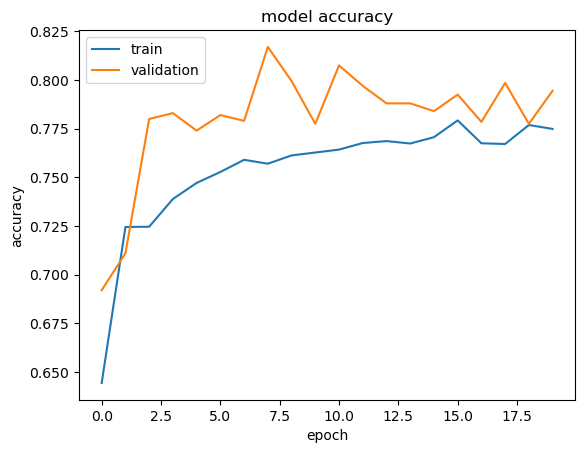

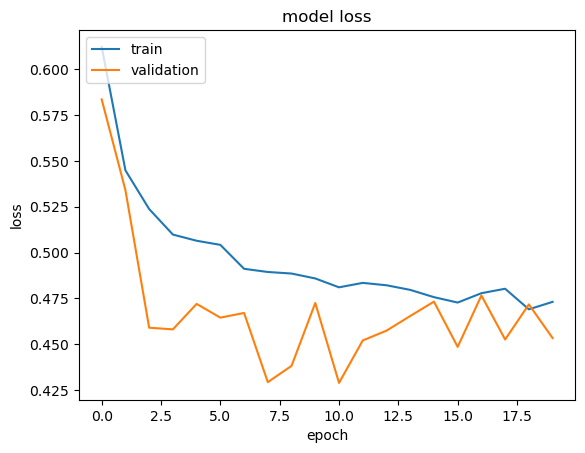

In [36]:
#  "Accuracy Plot"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
predictions = np.round(model.predict(Xtest))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [38]:
# Check Accuracy

from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(Ytest , predictions) # Accuracy is good

0.7945

In [39]:
# We don't see the problem of predicting everything as class 0
confusion_matrix(Ytest , predictions)

array([[1281,  323],
       [  88,  308]])

In [40]:
from sklearn.metrics import classification_report 

print(classification_report(Ytest , predictions))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1604
           1       0.49      0.78      0.60       396

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000

